In [1]:
]activate ../../../

  Activating project at `~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode`


In [2]:
using GLMakie

In [3]:
using Revise
includet("./base.jl")
using StatsBase

In [4]:
using CairoMakie

# Space

In [9]:
f = jldopen("./main2_results.jld2")
logKs = f["logKs"]
ls = f["ls"]
sf = f["final_states"];
f

JLDFile /home/honza/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode/cluster_env/runs/mm_v2_explike/main2_results.jld2 (read-only)
 ├─🔢 logKs
 ├─🔢 ls
 ├─🔢 params
 ├─🔢 retcodes
 ├─🔢 final_states
 ├─🔢 L
 ├─🔢 sN
 └─🔢 epsilon

## Looking at final state abundances

In [10]:
# final states averaged accros space
sfsums = map(sf) do su
    mean(su; dims=2)[:,1]
end;
sfstds = map(sf) do su
    std(su; dims=2)[:,1]
end;

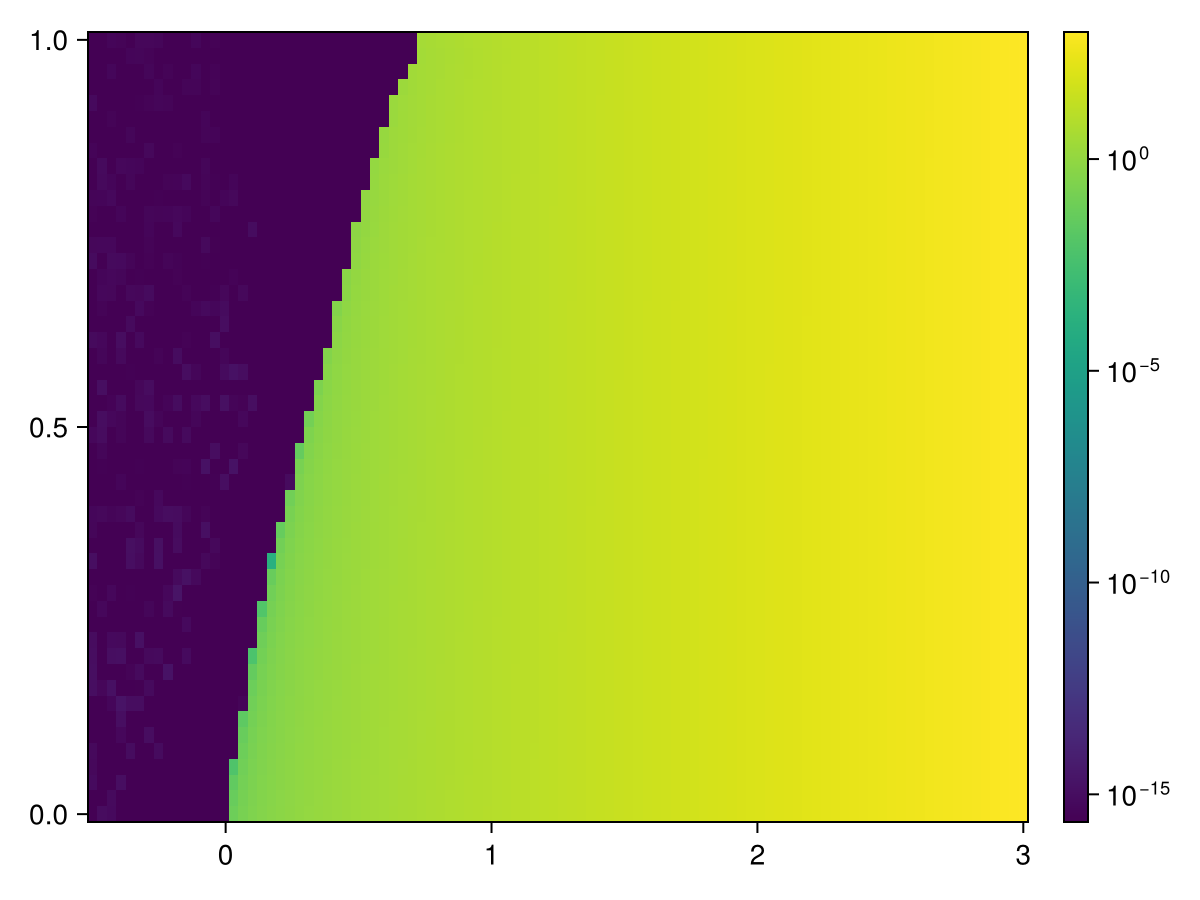

In [11]:
xx = getindex.(sfsums, 1)
yy = clamp.(xx, max(minimum(xx), eps()), Inf)
fap = heatmap(logKs, ls, yy;
    colorscale=log10
)
Colorbar(fap.figure[1,2], fap.plot)
fap

### Peaks in N

In [13]:
using Peaks

In [14]:
final_Ns = map(sf) do su
    su[1,:]
end;

In [147]:
xx = map(final_Ns) do n
    try
        xx = findpeaks(n, 50)
        
        peakwidths!(xx; min=4)
        peakproms!(xx; min=2)
        (xx.heights, xx.widths)
    catch e
        ([], [])
    end
end;
numpeaks = map(xx) do x
    length(x[1])
end;
avgheights = map(xx) do x
    isempty(x[1]) ? 0. : mean(x[1])
end;
avgwidths = map(xx) do x
    isempty(x[1]) ? 0. : mean(x[2])
end;
# xx

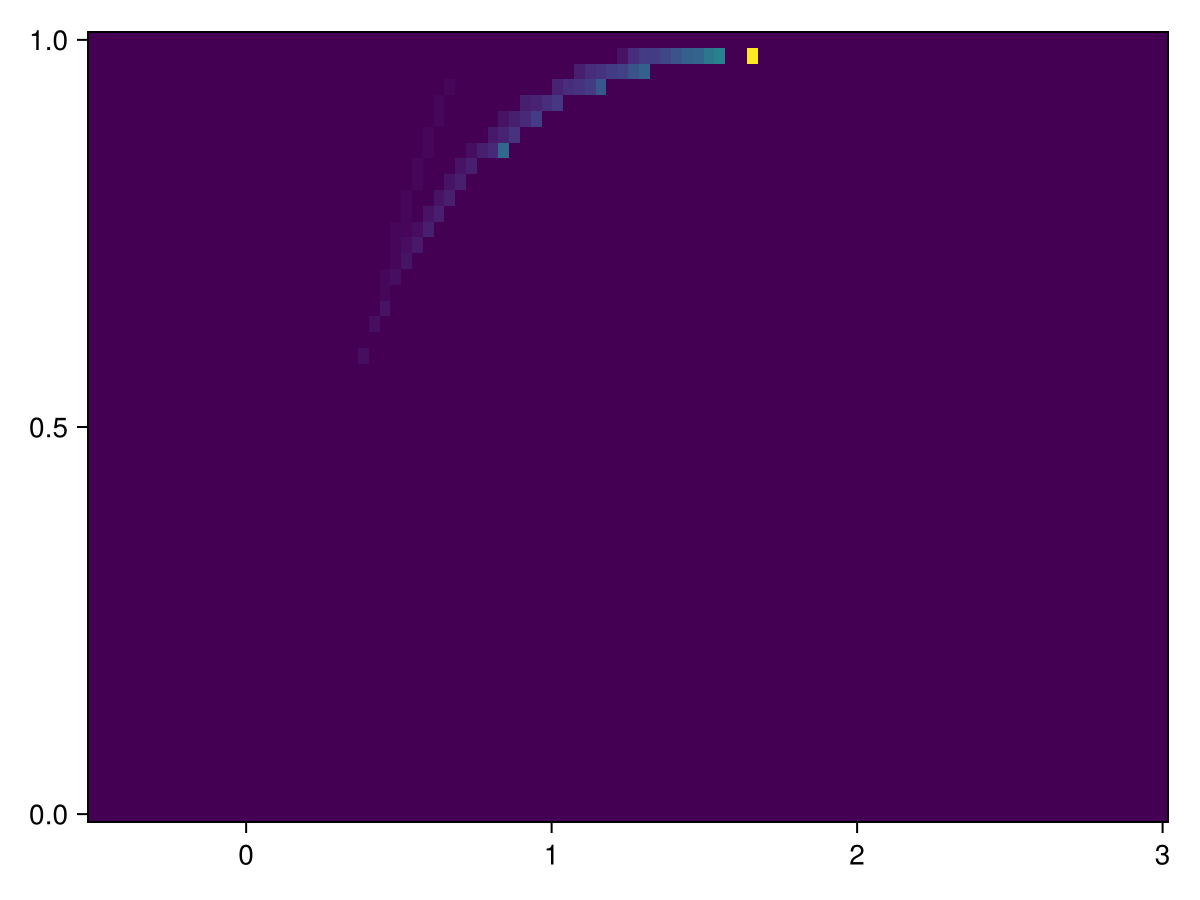

In [151]:
heatmap(logKs, ls, numpeaks)

##### Learning how to use Peaks

In [114]:
n = rand(final_Ns);
# fap = scatter(n)

In [116]:
xx.

10000-element Vector{Float64}:
 4.189440992717516
 4.189386208318009
 4.1894378422363525
 4.189380459771995
 4.189407350975934
 4.1893481336488
 4.1893353675112
 4.18934539073762
 4.189440841388544
 4.189440745951759
 4.189352454029981
 4.189348014301537
 4.189347754861053
 ⋮
 4.189409012444482
 4.189383308435647
 4.189335959945551
 4.189353726720511
 4.189358643156936
 4.189296290888811
 4.189335050073583
 4.189404961693147
 4.189361897192555
 4.189364531185453
 4.189312616106133
 4.189385506625279

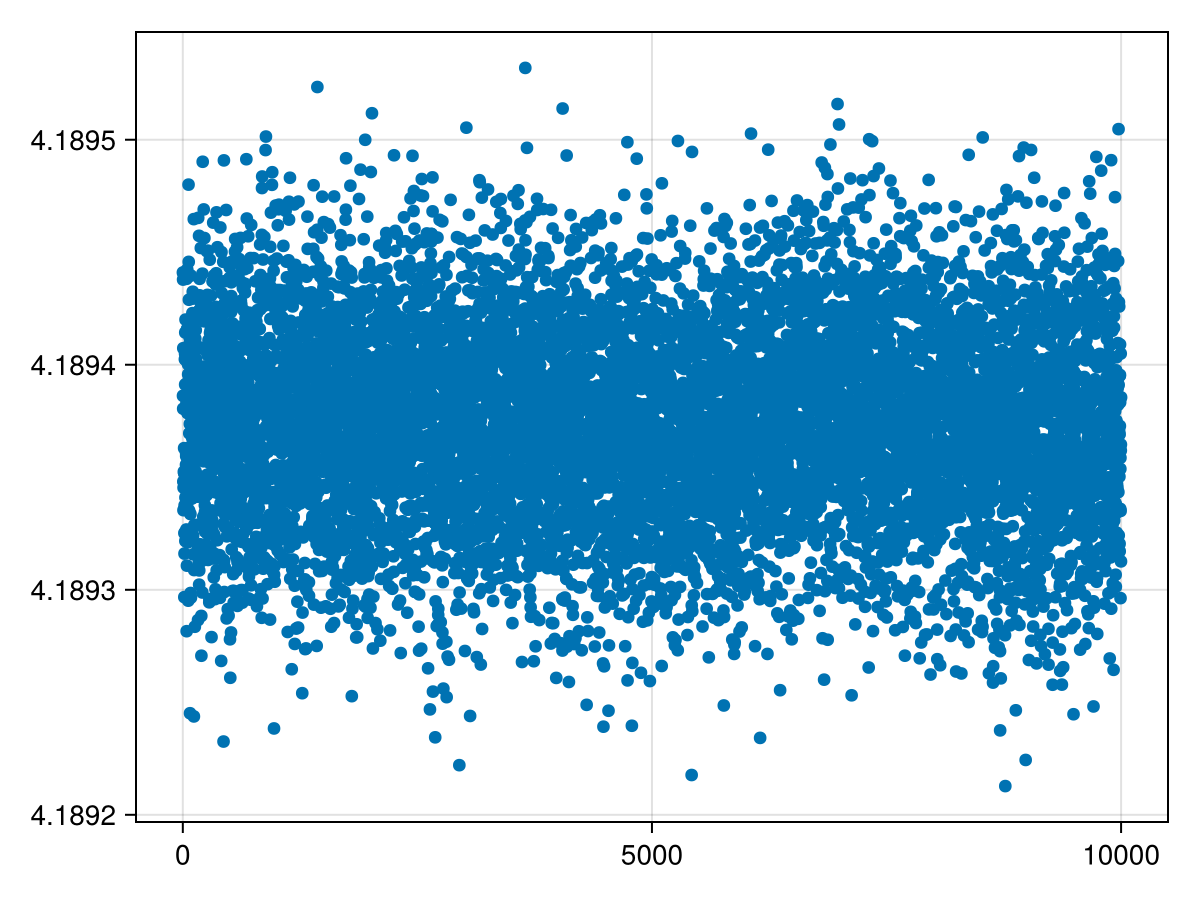

In [115]:
# xx = findpeaks(n, 50; widths=(; min=4), proms=(; min=2))
xx = findpeaks(n, 50)
peakwidths!(xx; min=4)
peakproms!(xx; min=2)
# xx = peakproms(peakwidths(xx; min=4); min=2)

fap = scatter(n)
scatter!(fap.axis, xx.indices, xx.heights)
fap

In [77]:
xx = findpeaks(n, 50; widths=(; min=5))

(indices = [257, 1346, 2416, 2971, 3509, 4653, 5269, 5808, 6498, 6938, 8031, 9143], heights = [1879.3398654884863, 1818.742080172004, 1809.0219112399848, 3.459119278675361e-269, 1913.6587158885952, 1978.926874996613, 4.050343627475708e-267, 1972.4283768321532, 4.582952174420758e-266, 1902.4430674426833, 1876.907458324364, 1904.0191899844933], data = [2.5130422180831975e-260, 1.6849869594456832e-258, -2.4149243535617825e-259, -1.1840633402552305e-258, 2.1156808380991638e-259, 3.0296093747643665e-258, -2.4777097976431064e-258, -7.184140324802482e-258, 1.7439686787385945e-257, -1.3499570346167022e-257  …  -1.2058770872231117e-258, 2.4758745490446477e-258, 5.659311565277212e-258, -2.6570875852646027e-258, -8.95914143893792e-258, -2.4725190615966635e-258, 6.197087030824797e-258, 3.7406297881603708e-258, -2.141815293815641e-258, -2.3136536862129557e-258], proms = [1879.3398654884863, 1818.742080172004, 1809.0219112399848, 2.0562604434230526e-267, 1913.6587158885952, 1978.926874996613, 8.8645

In [61]:
peakwidths(xx; min=5)

(indices = Int64[], heights = Float64[], data = [479.3930668583815, 479.39308319938607, 479.39308625510455, 479.393075452154, 479.39305496913516, 479.3930368670098, 479.39303809766875, 479.3930621369037, 479.393087594653, 479.3930886966716  …  479.3930624377531, 479.39305610052946, 479.39305878179323, 479.3930614570881, 479.3930621283268, 479.3930663215964, 479.3930720393448, 479.39306950880973, 479.39305708162703, 479.3930463314457], proms = Float64[], widths = Float64[], edges = Tuple{Float64, Float64}[])

In [57]:
xx.proms ./ xx.widths

6-element Vector{Float64}:
 2.4880694056602354e-5
 2.1975575994870742e-5
 2.8204388849199628e-5
 1.7976210076440248e-5
 2.1006278111015457e-5
 1.8807702563016446e-5

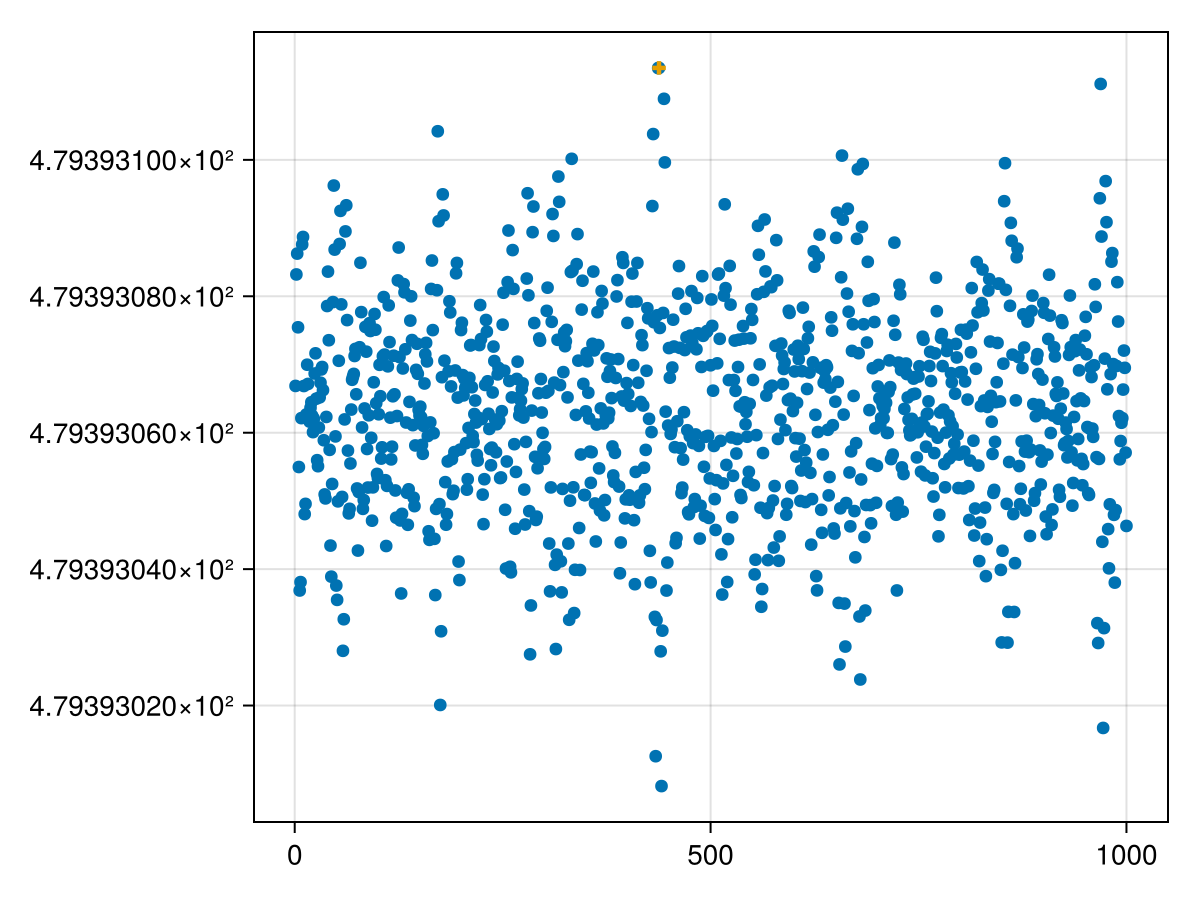

In [41]:
sn = n[1:1000]

xx = findpeaks(sn, 100; proms=(; min=1e-4))

fap = scatter(1:length(sn), sn)
scatter!(fap.axis, xx.indices, xx.heights; marker=:cross)

fap

In [32]:
xx

(indices = [172, 438, 658, 854], heights = [479.3931041919586, 479.39311347908205, 479.39310062266173, 479.3930995102553], data = [479.3930668583815, 479.39308319938607, 479.39308625510455, 479.393075452154, 479.39305496913516, 479.3930368670098, 479.39303809766875, 479.3930621369037, 479.393087594653, 479.3930886966716  …  479.3930624377531, 479.39305610052946, 479.39305878179323, 479.3930614570881, 479.3930621283268, 479.3930663215964, 479.3930720393448, 479.39306950880973, 479.39305708162703, 479.3930463314457], proms = [7.616871630489186e-5, 0.0001009059245689059, 7.459382118213398e-5, 7.034092868707376e-5], widths = [3.0613581812312702, 3.577667472549024, 3.551025116772962, 3.7400064389253203], edges = [(170.53891758881596, 173.60027577004723), (435.68240650405966, 439.2600739766087), (656.425502353975, 659.976527470748), (851.7892209765583, 855.5292274154837)])

### Comparing to no-space final abundances!

In [329]:
ns = m3r.final_states
ws = sfsums
Nns = getindex.(ns, 1)
Nws = getindex.(ws, 1);

In [331]:
minval = max(min(minimum(Nws), minimum(Nns)), eps())
maxval = max(maximum(Nws), maximum(Nns))
cNws = clamp.(Nws, minval, Inf)
cNns = clamp.(Nns, minval, Inf);

#### Plotting side by side

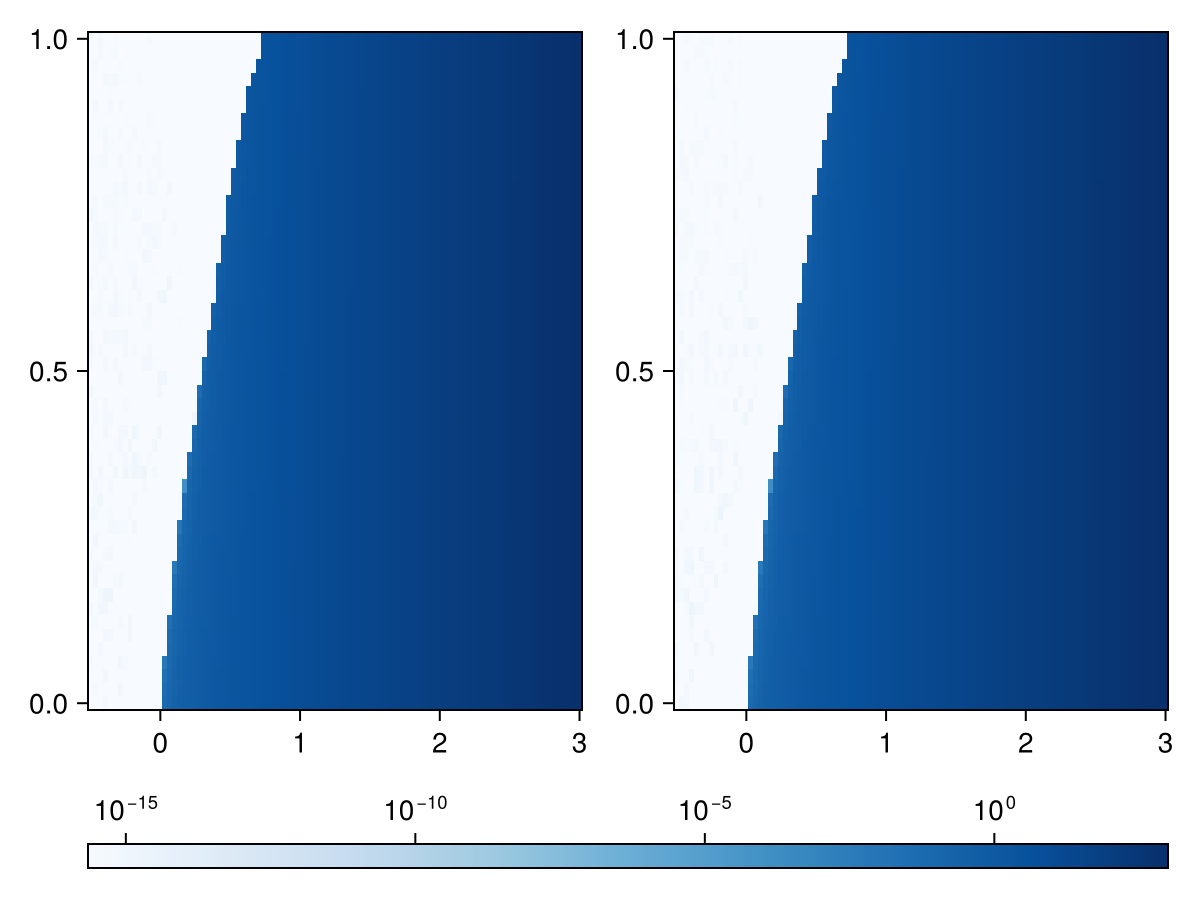

In [332]:
fig = Figure()
ax1 = Axis(fig[1,1])
ax2 = Axis(fig[1,2])

hm_kwargs = (;
    colormap=:Blues,
    colorrange=(minval, maxval),
    colorscale=log10
)

hm1 = heatmap!(ax1, logKs, ls, cNns; hm_kwargs...)
hm2 = heatmap!(ax2, logKs, ls, cNws; hm_kwargs...)

Colorbar(fig[2,:], hm1; vertical=false)


fig
# fap = heatmap(dN ./ (Nws .+ Nns);
# fap = heatmap(dN / (Nws .+ Nns);
    # colorscale=Makie.Symlog10(1000*eps())
    # colorscale=Makie.pseudolog10
# )
# Colorbar(fap.figure[1,2], fap.plot)
# fap

#### Correlation?

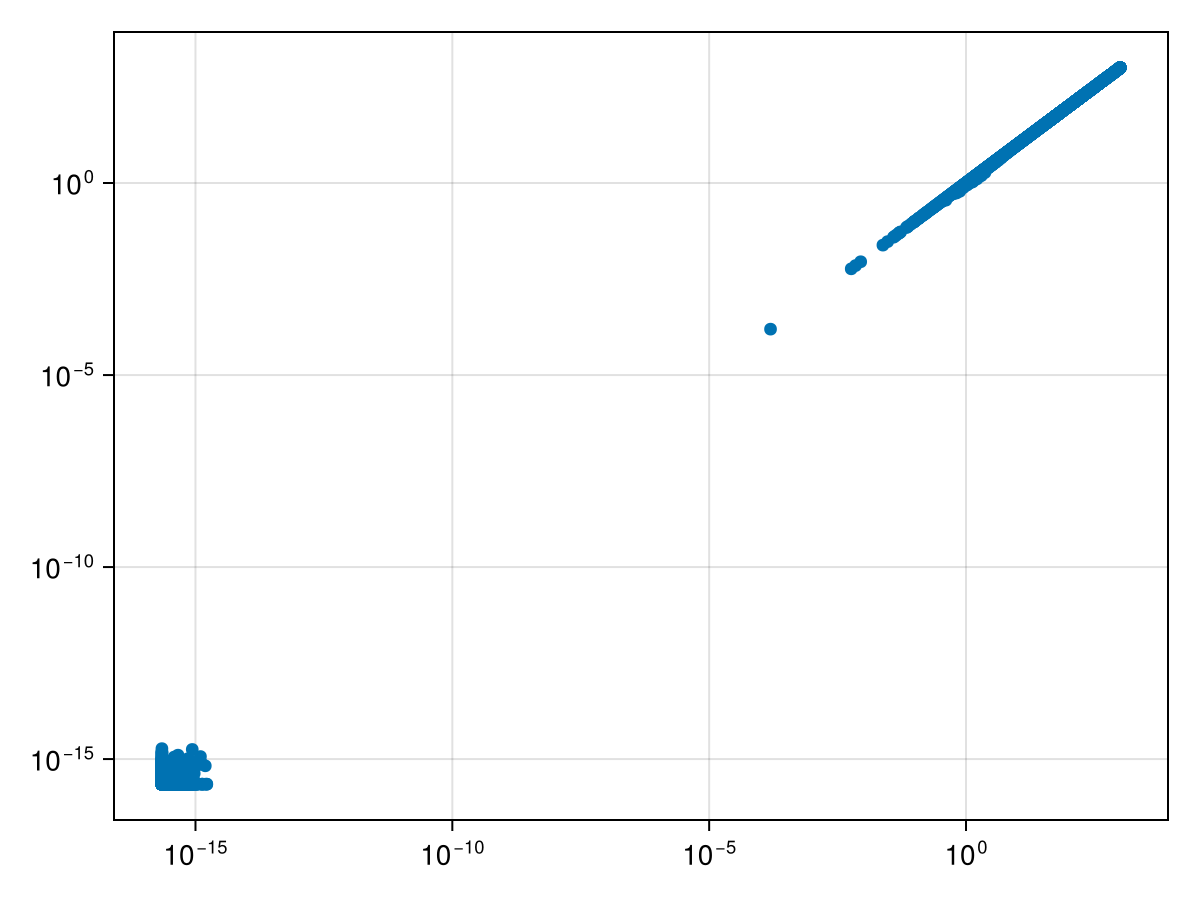

In [334]:
scatter(cNns[:], cNws[:];
    axis=(;
        xscale=log10,
        yscale=log10,
    )
)

#### Survivability only

In [263]:
thrh = 1e-10
surns = Nns .> thrh
surws = Nws .> thrh;

status = similar(surns, Int)
for i in eachindex(surns)
    status[i] = if !(surns[i]) && !(surws[i])
        1
    elseif !(surns[i]) && (surws[i])
        2
    elseif (surns[i]) && !(surws[i])
        3
    elseif (surns[i]) && (surws[i])
        4
    else
        throw(ErrorException("KAKAK"))
    end
end
countmap(status)

Dict{Int64, Int64} with 2 entries:
  4 => 3824
  1 => 1176

#### Looking at the difference

In [321]:
dN = Nws .- Nns;

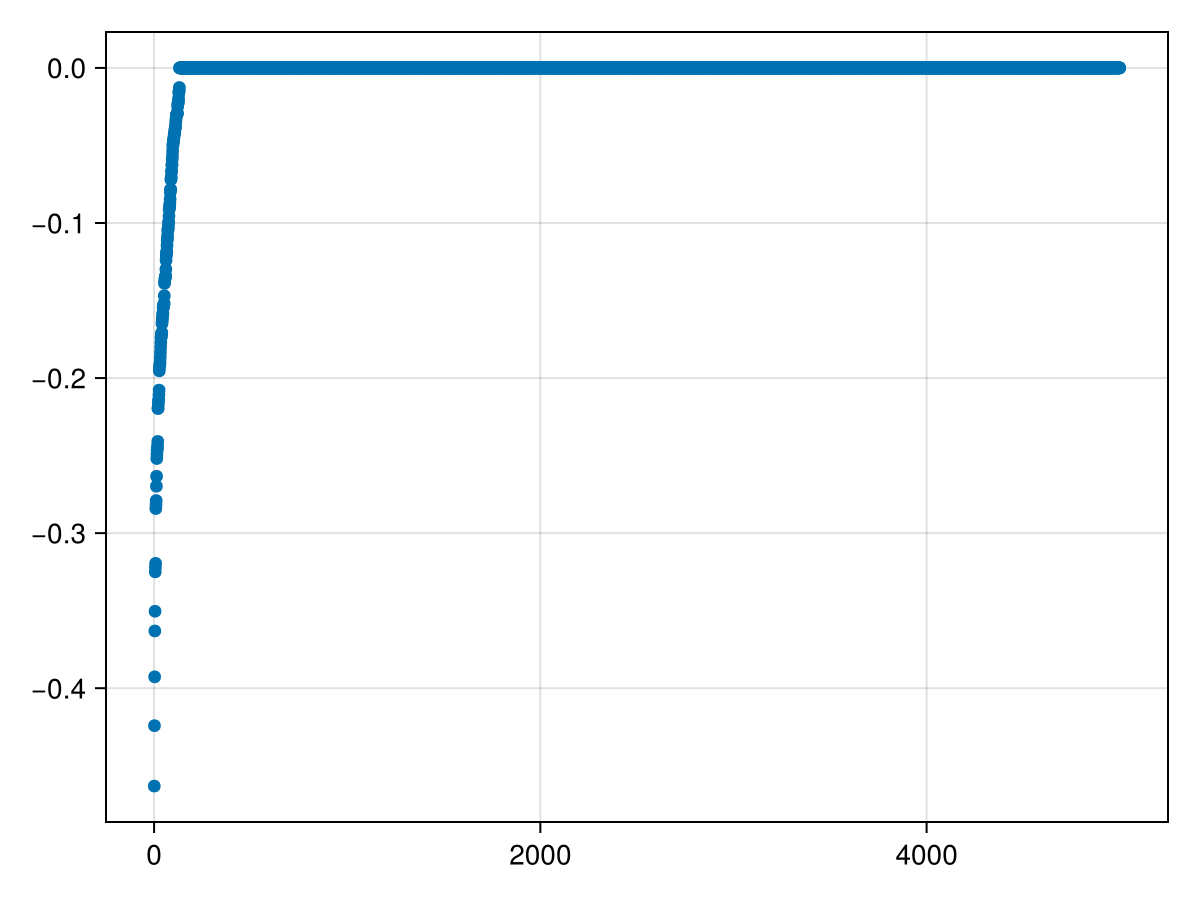

In [322]:
scatter(sort(dN[:]))

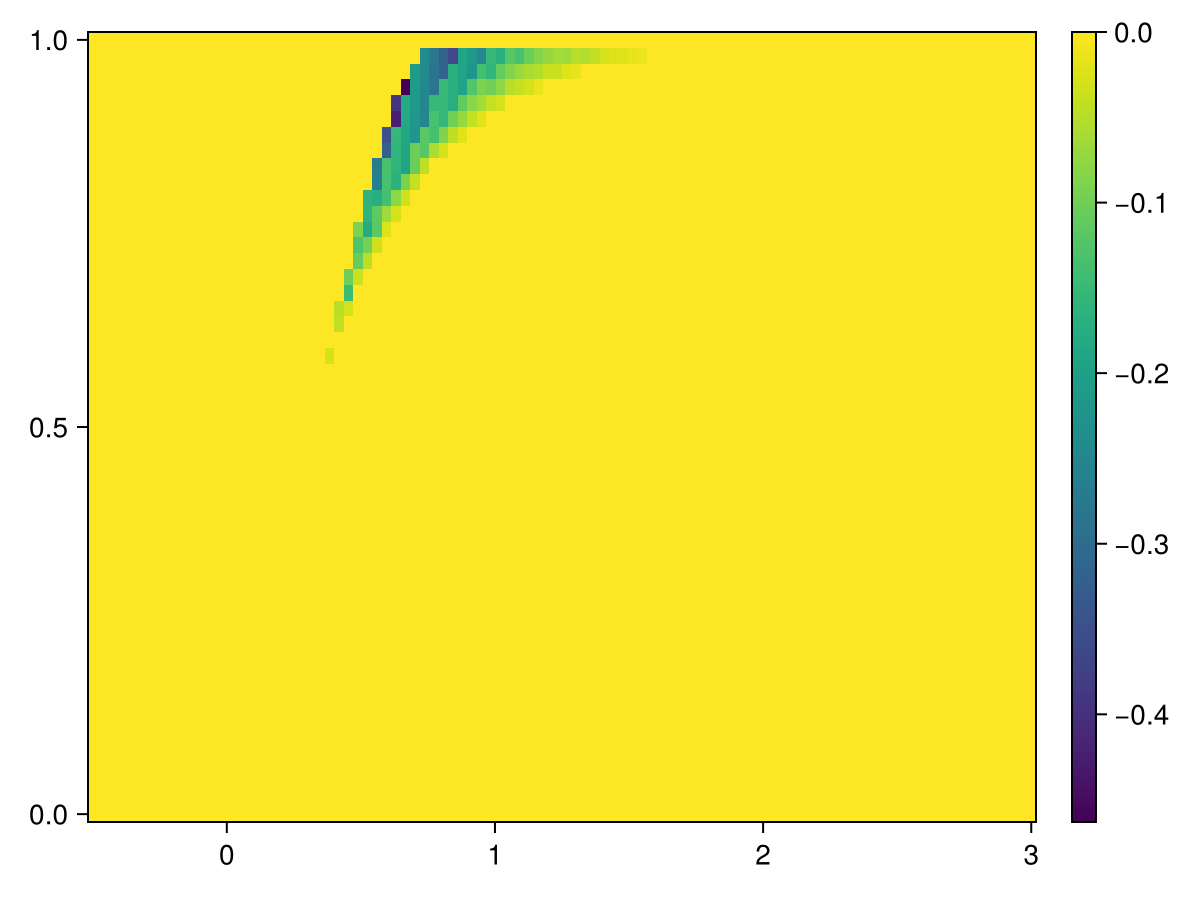

In [324]:
fap = heatmap(logKs, ls, dN;
# fap = heatmap(dN / (Nws .+ Nns);
    # colorscale=Makie.Symlog10(1000000*eps())
    # colorscale=Makie.pseudolog10
)
Colorbar(fap.figure[1,2], fap.plot)
fap

## Looking at the data first

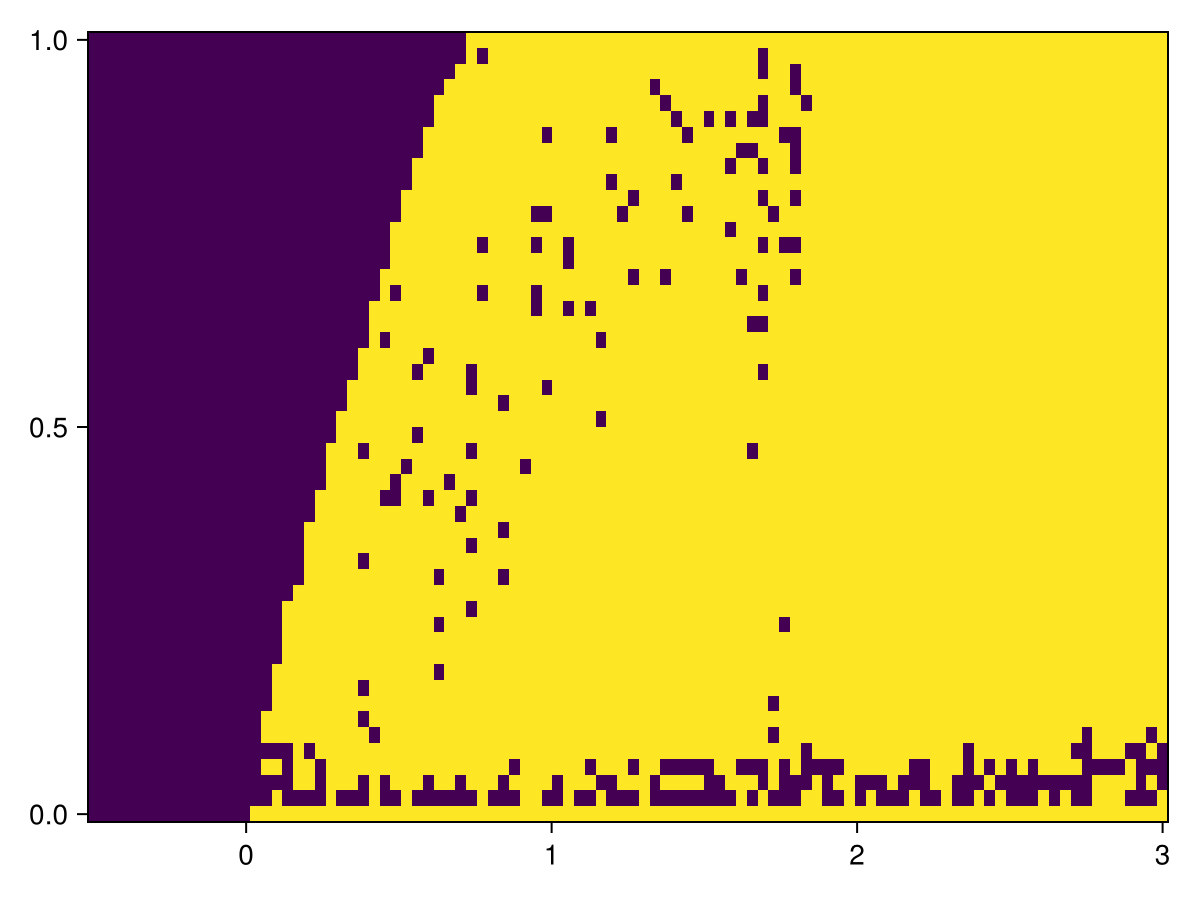

In [319]:
heatmap(f["logKs"], f["ls"], Int.(f["retcodes"]))

In [79]:
xx = findall(f["retcodes"][:,end-1]) do rc
    rc == ReturnCode.Success
end
show(xx)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 63]

In [74]:
xx = findall(f["retcodes"]) do rc
    rc == ReturnCode.Success
end;

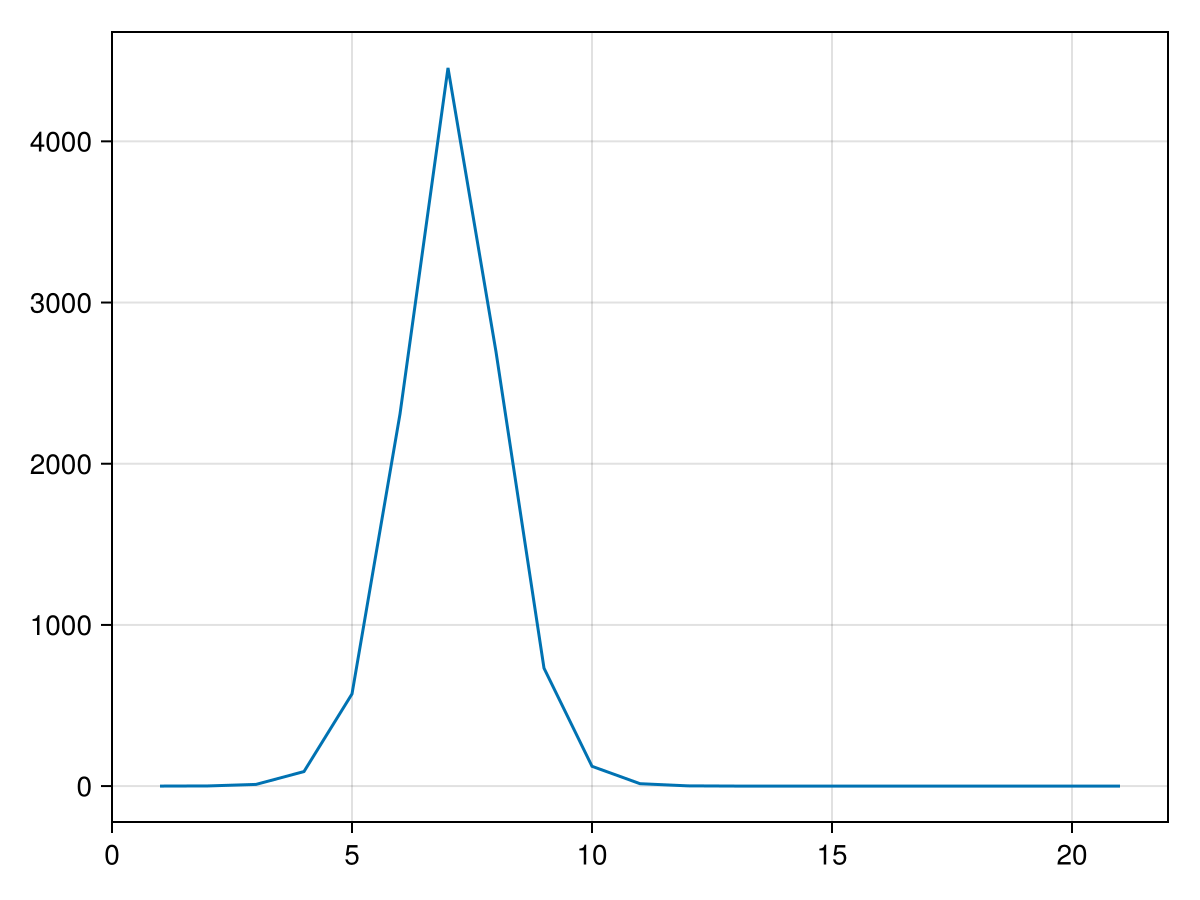

In [303]:
lines(sf[34,end-4][1,2140:2160])

# No-space

In [5]:
@time m3r = main3();

Progress: 100%|█████████████████████████████████████████| Time: 0:00:36


 37.395125 seconds (59.85 M allocations: 4.793 GiB, 1.98% gc time, 394.41% compilation time: <1% of which was recompilation)


In [6]:
countmap(m3r.retcodes)

Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 5000

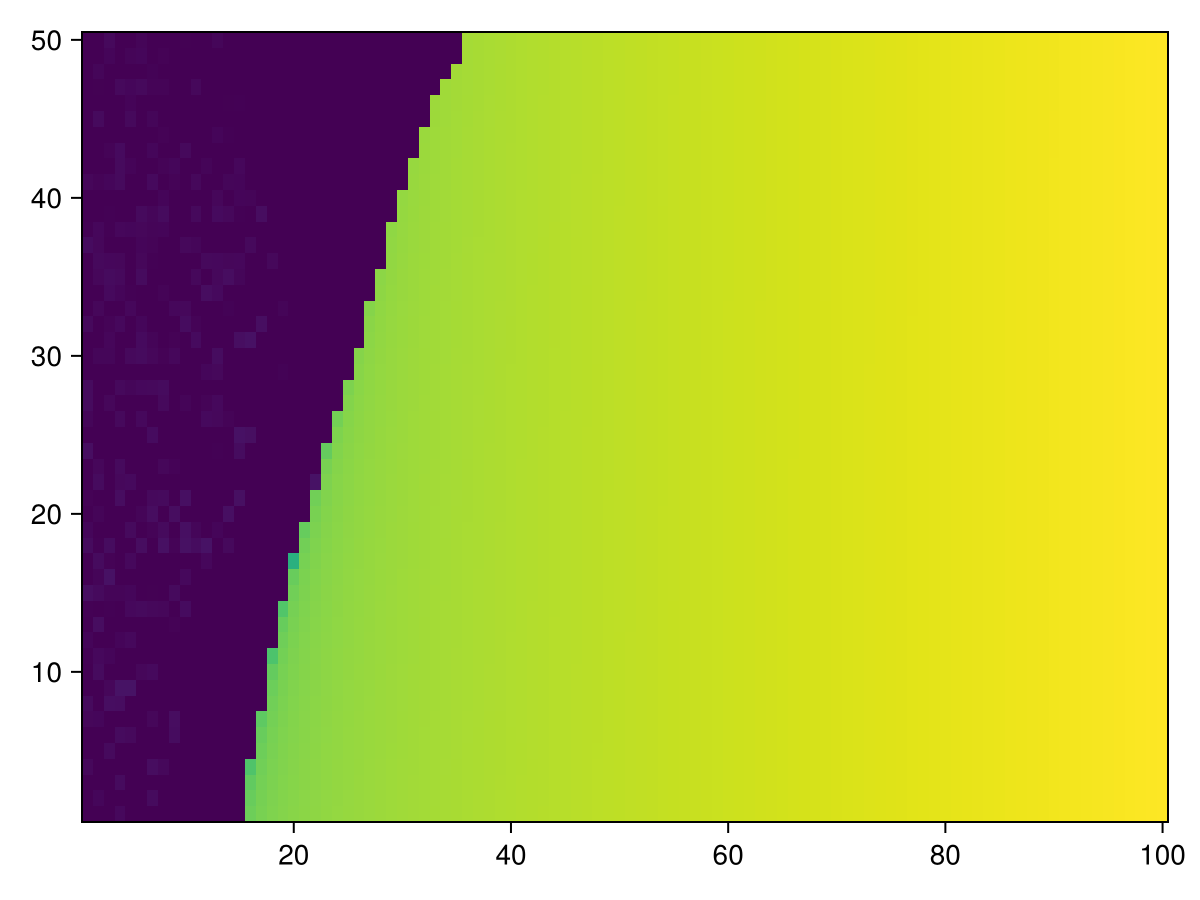

In [7]:
xx = getindex.(m3r.final_states, 1)
yy = clamp.(xx, max(minimum(xx), eps()), Inf)
heatmap(yy;
    colorscale=log10
)

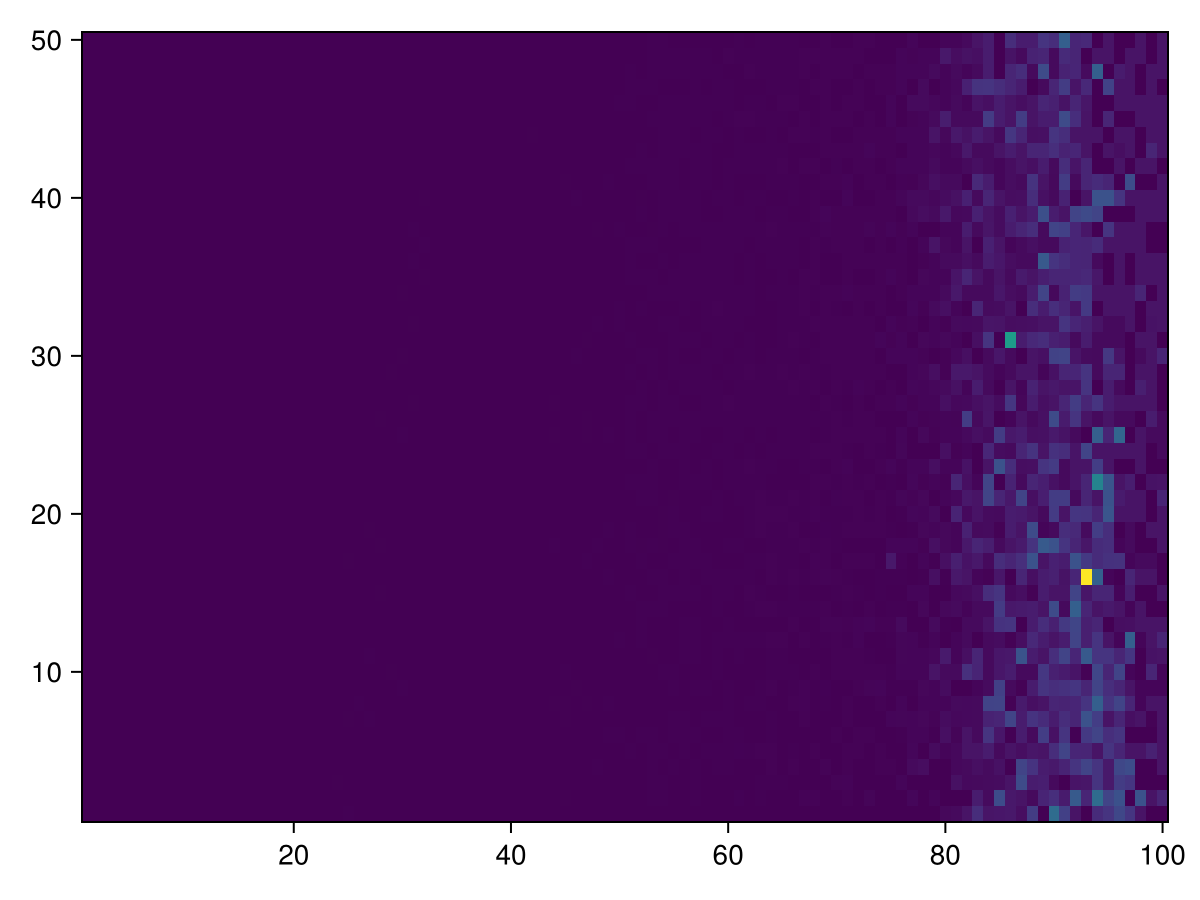

In [8]:
heatmap(maximum.(abs, mmicrmresid.(m3r.final_states, m3r.params)))